In [1]:
#Importing Required Libraries
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
matplotlib.style.use('ggplot')
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the csv file
os.chdir('C:/Users/sharma_ak/Desktop/Internshala/')
cust_df =pd.read_csv('bank-additional-full.csv',sep=';')
display(cust_df.head(2))
print(cust_df.dtypes)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


<h3> Data Exploration <h3>

In [3]:
#We will calculate Mean, Median and Quantile information of Numerical Features
cust_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [4]:
#Lets check for the missing Values
cust_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
# check if there are columns that have only one value

cname=list()
for column in cust_df:
    y=pd.Series(cust_df[column].unique())
    if (y.isnull().sum() > 0):
        if y.shape[0]==2:
            cname.append(column) 
    else:
        if y.shape[0]==1:
            cname.append(column)
print(cname)

# check if there are columns that have only one value for 90% of the observations

cname=list()
cnt=cust_df.shape[0]
for column in cust_df:
    y=cust_df[column].value_counts().reset_index().rename(columns={'index': column, column: 'freq'})
    y['flag']=np.where(y.freq/cnt>0.90,1,0);
    if y['flag'].sum()>0:
        cname.append(column)
print(cname)

# pdays variable consists of one value '999' for more than 90% of the data, which means that more than 90%
# of the customers were not contacted previously

[]
['pdays']


['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


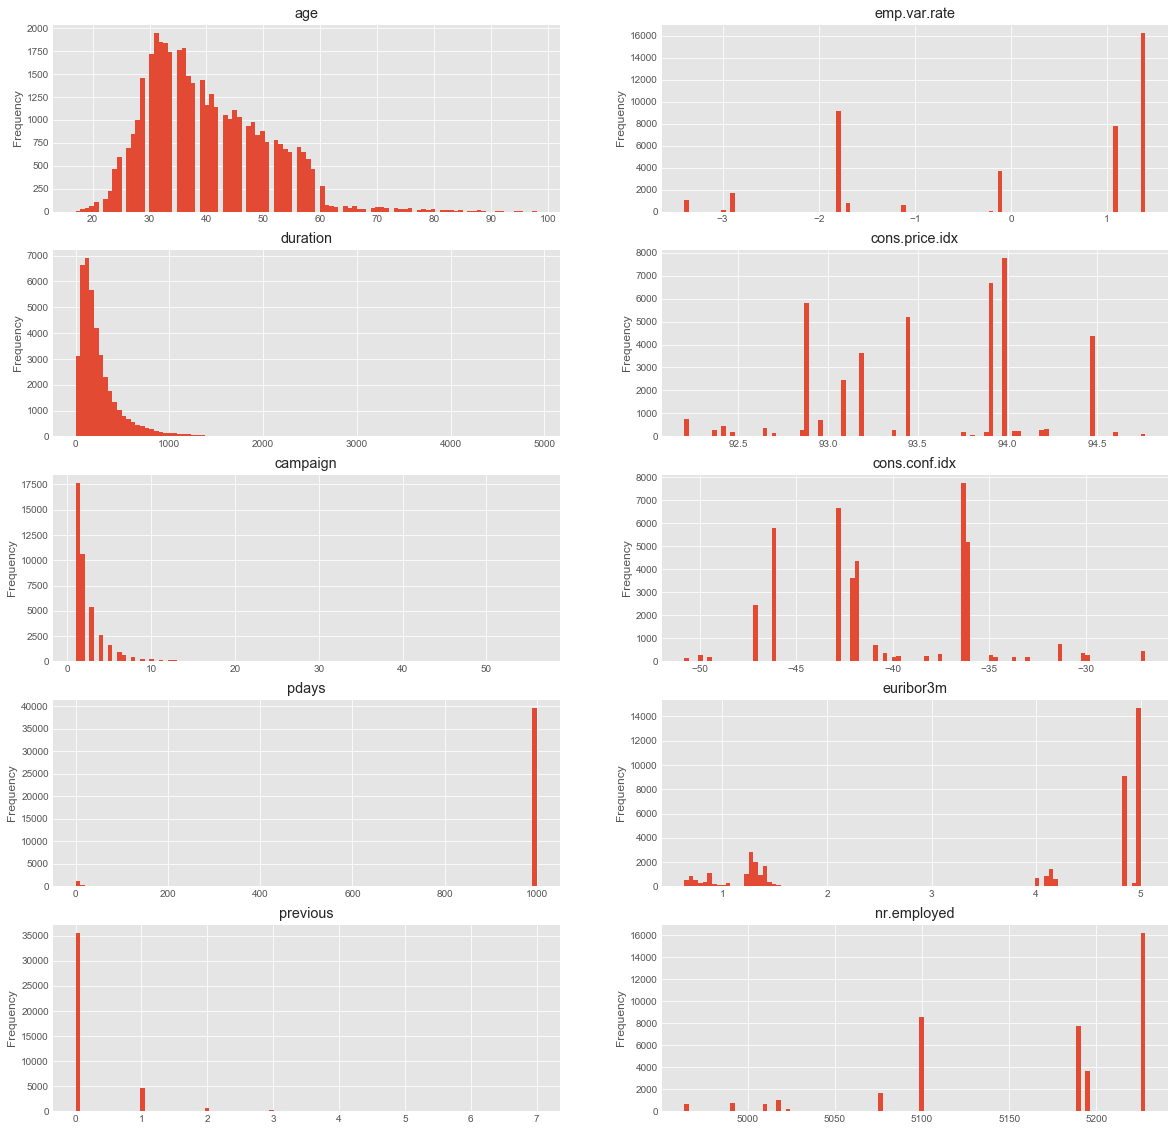

In [6]:
#We will check the distribution of Numerical Variables
numcols=cust_df._get_numeric_data().columns.values.tolist()
print(numcols)
fig, axes = plt.subplots(nrows=round(len(numcols)/2), ncols=2,figsize=(20,20))
i=0
j=0
for item in numcols:
    cust_df[item].plot.hist(ax=axes[i,j],bins=100); axes[i,j].set_title(item);
    if i == round(len(numcols)/2)-1: 
        i=0
        j=1
    else: i=i+1

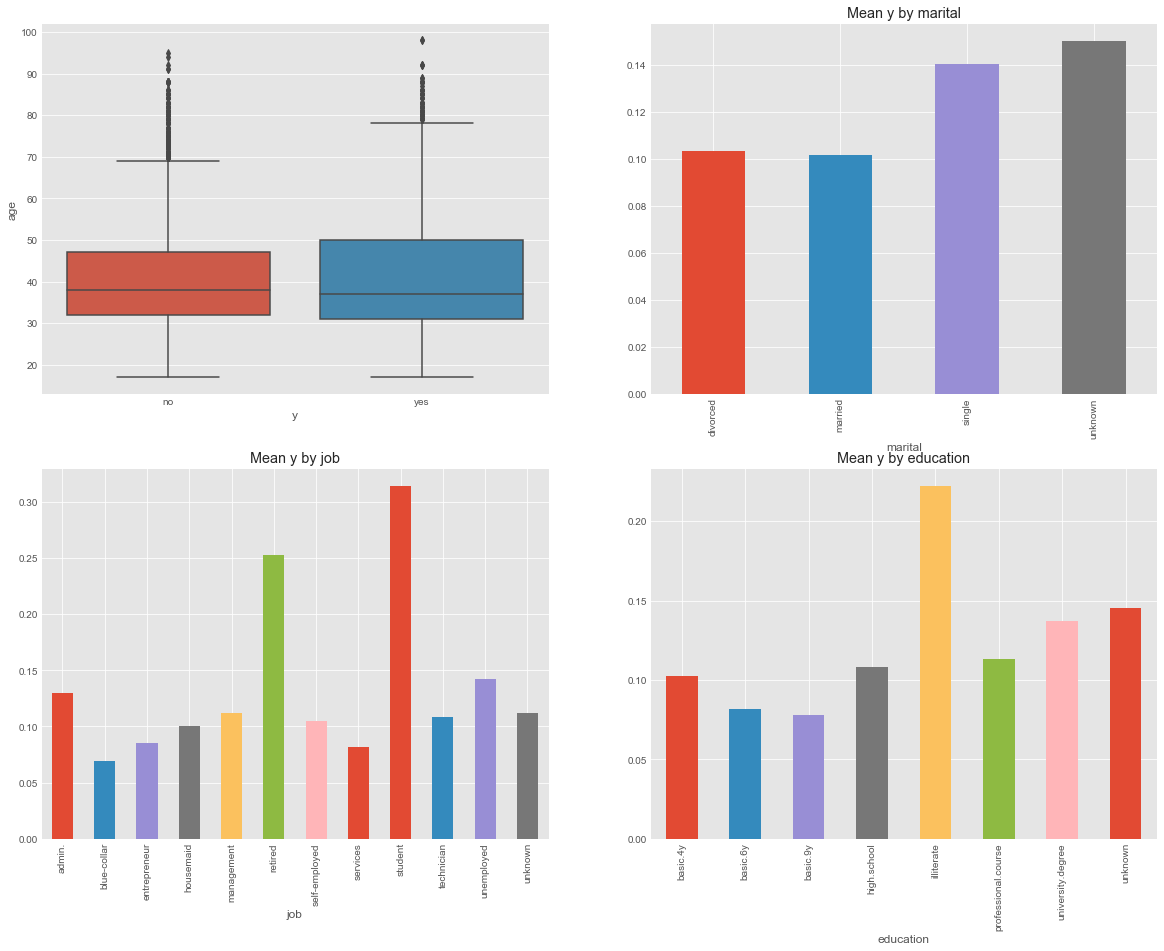

In [7]:
#We will check the distribution of variables with respect to target variable
cust_df['label']=np.where(cust_df['y']=='yes',1,0)
def barplot(df, x , y, title, p , q):
    l=[x,y]
    means = df[l].groupby(x).agg([np.mean, np.std])
    means.columns = means.columns.droplevel()
    means['mean'].plot.bar(title=title,ax=axes[p,q]) 
    
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(20,15))
sns.boxplot(x="y", y="age", data=cust_df,ax=axes[0,0])
barplot(cust_df,'job','label', "Mean y by job",1,0)
barplot(cust_df,'marital','label', "Mean y by marital",0,1)
barplot(cust_df,'education','label', "Mean y by education",1,1)




#Observations from the Given Data
#Age does not seems to be a relevant feature
#Single people are more likely to say yes to test deposit
#Iliterate are more likely to say Yes
#Student and Retired Person are more likely to say yes

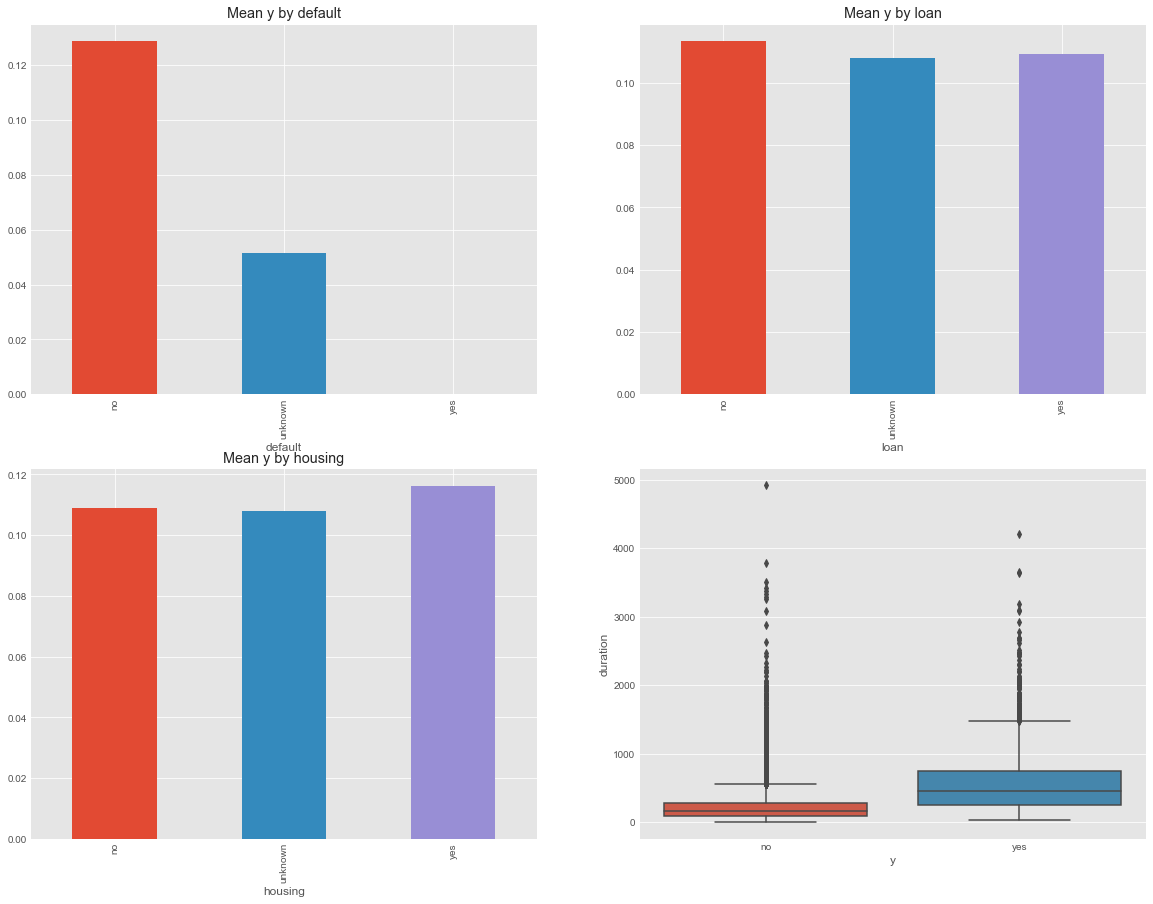

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(20,15))
barplot(cust_df,'default','label', "Mean y by default",0,0)
barplot(cust_df,'housing','label', "Mean y by housing",1,0)
barplot(cust_df,'loan','label', "Mean y by loan",0,1)
sns.boxplot(x="y", y="duration", data=cust_df,ax=axes[1,1])

#People who have credit in Default are not likely to subscribe
#Most people wo are contacted by cellular phone are likely to say yes
#More duration of call more people are likely to say yes

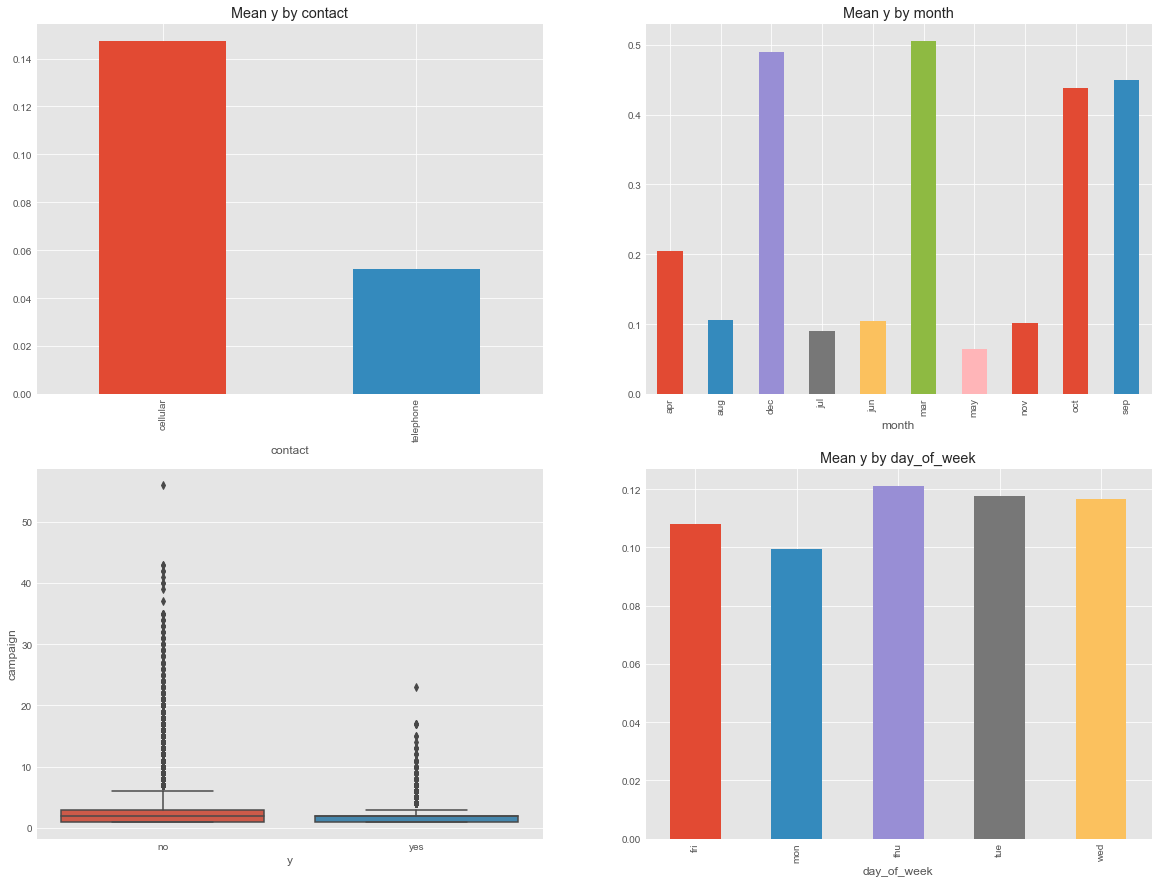

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(20,15))
barplot(cust_df,'contact','label', "Mean y by contact",0,0)
sns.boxplot(x="y", y="campaign", data=cust_df,ax=axes[1,0])
barplot(cust_df,'month','label', "Mean y by month",0,1)
barplot(cust_df,'day_of_week','label', "Mean y by day_of_week",1,1)

# Cellular more chance of yes
# More success in specific months and mid weekdays
# More success in fewer campaign contacts


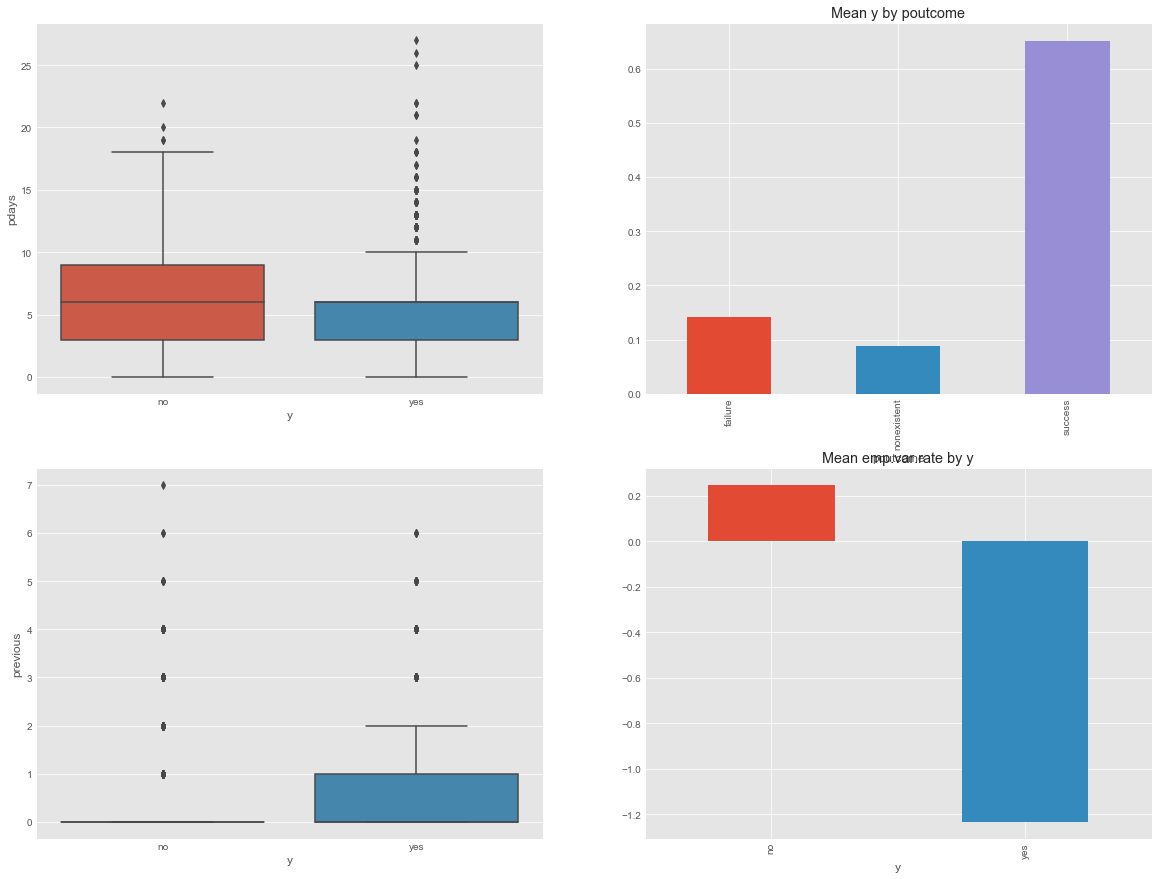

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(20,15))
sns.boxplot(x="y", y="pdays", data=cust_df[cust_df.pdays!=999],ax=axes[0,0])
sns.boxplot(x="y", y="previous", data=cust_df,ax=axes[1,0])
barplot(cust_df,'poutcome','label', "Mean y by poutcome",0,1)
barplot(cust_df,'y','emp.var.rate', "Mean emp.var.rate by y",1,1)

# More chances of success if success in previous campaigns
# Lesser Pdays more success
# higher previous higher success
# emp.var.rate is useful

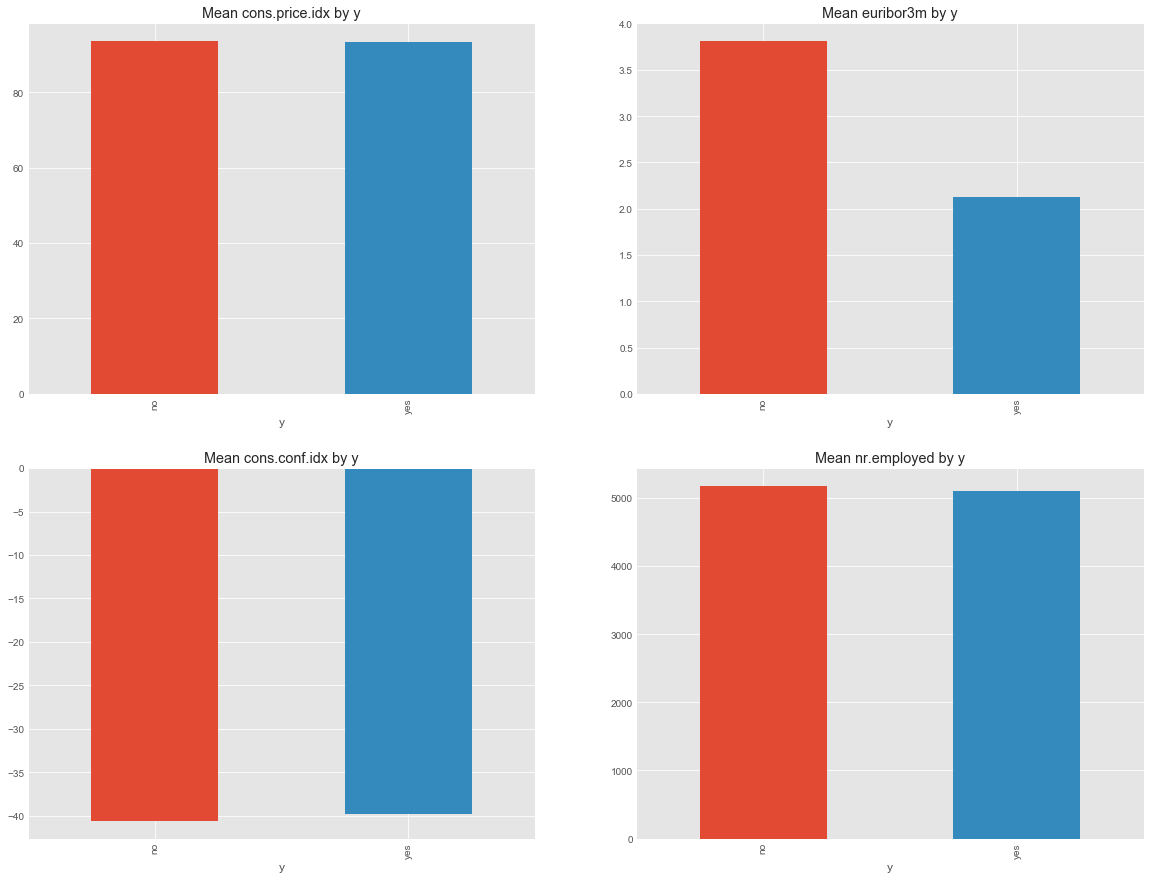

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(20,15))
barplot(cust_df,'y','cons.price.idx', "Mean cons.price.idx by y",0,0)
barplot(cust_df,'y','cons.conf.idx', "Mean cons.conf.idx by y",1,0)
barplot(cust_df,'y','euribor3m', "Mean euribor3m by y",0,1)
barplot(cust_df,'y','nr.employed', "Mean nr.employed by y",1,1)

# only euribor3m is useful


<h3> Feature Engineering Steps <h3>

In [12]:
# Some more feature engineering
import math

def pday(x):
    if x>10: return("More Than 10")
    elif x>0: return("1 to 10")
    elif x==0: return("Not Contacted")
    
def job(x):
    if x=="unemployed": return("unemployed")
    elif x in ["student","retired"]: return("non-working")
    else: return("working")
    
def marital(x):
    if x=="unknown": return("unknown")
    elif x in ["married","divorced"]: return("married-once")
    else: return("single")
    
def education(x):
    if x=="unknown": return("unknown")
    elif x in ["illiterate"]: return("illiterate")
    else: return("some-education")
    
def enc(x):
    if x=="unknown": return(-1)
    elif x in ["yes"]: return(1)
    else: return(0)
    
def day(x):
    if x in ["mon","fri"]: return(0)
    else: return(1)

cust_df['label']=np.where(cust_df['y']=='yes',1,0)
cust_df['lage']=[math.log(x) for x in cust_df['age']]
cust_df['lduration']=[math.log(x+1) for x in cust_df['duration']]
cust_df['lcampaign']=[math.log(x) for x in cust_df['campaign']]
cust_df['previous_flag']=np.where([(x>0) for x in cust_df['previous']],1,0)
cust_df['npdays']=np.where(cust_df['pdays']==999,0,cust_df['pdays'])
cust_df['pday_t']=[pday(x) for x in cust_df['npdays']]
cust_df['job_t']=[job(x) for x in cust_df['job']]
cust_df['marital_t']=[marital(x) for x in cust_df['marital']]
cust_df['education_t']=[education(x) for x in cust_df['education']]
cust_df['default_t']=[enc(x) for x in cust_df['default']]
cust_df['housing_t']=[enc(x) for x in cust_df['housing']]
cust_df['loan_t']=[enc(x) for x in cust_df['loan']]
cust_df['day_t']=[day(x) for x in cust_df['day_of_week']]
cust_df['poutcome_t']=np.where(cust_df['poutcome']=='success',1,0)
cust_df['leuribor3m']=[math.log(x) for x in cust_df['euribor3m']]


In [13]:
# prep data to remove unnecessary columns and create dummies

colnames=cust_df.columns.values.tolist()

# prepare exclusion list for variables required to be dropped

excl=['age','job','marital','education','default','housing','loan','day_of_week','duration',
      'campaign','pdays','previous','poutcome','euribor3m','y','npdays']

retain=list(set(colnames) - set(excl))

# Create train dataset with variables required to be retained

train_1=cust_df[retain]

# identify categorical variables to create dummies

cols=train_1.columns.values.tolist()
numcols=train_1._get_numeric_data().columns.values.tolist()
catcols=list(set(cols) - set(numcols))

# get dummies

dummies=pd.get_dummies(train_1[catcols], prefix=['col1', 'col2', 'col3', 'col4','col5', 'col6'])
train= pd.concat([train_1[numcols], dummies], axis=1)

<h3>Train Test Split and Model Development</h3>

In [14]:
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.model_selection import train_test_split

label=['label']
train_features=list(set(train.columns.values.tolist()) - set(label))

# Split data in test and train

X_train, X_test, y_train, y_test = train_test_split(train[train_features], train[label]
                                                    , test_size=0.3, random_state=123)

<h4> Building model with all Features </h4>

In [23]:


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 

kfold = KFold(n_splits= 5, random_state= 123)
result = cross_val_score(LogisticRegression(), X_train, y_train, cv=kfold, scoring='accuracy')

print("Accuracy:", result)
print("Mean Accuracy:", result.mean())
print("Median Accuracy:", np.median(result))

# The mean and median of accuracy on test is almost same indicating the model is not overfitting #

#*********************************** Fit a logistic model on full train data ****************#

logreg = LogisticRegression()
model = logreg.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score


train_pred=model.predict(X_train)
train_accu=accuracy_score(y_train,train_pred)
train_auc=roc_auc_score(y_train,train_pred)

print("Train Accuracy: ", train_accu)
print("Train AUC: ", train_auc)
print(classification_report(y_train,train_pred))

test_pred=model.predict(X_test)
test_accu=accuracy_score(y_test,test_pred)
test_auc=roc_auc_score(y_test,test_pred)
print("Test Accuracy: ",test_accu)
print("Test AUC: ", test_auc)
print(classification_report(y_test,test_pred))

# Even though the accuracy is high precision, recall and F1 for class 1 is low. The AUC is also not so 
# satisfactory 0.68

Accuracy: [0.77118644 0.77734977 0.85901387 0.76638396 0.77255204]
Mean Accuracy: 0.7892972166419365
Median Accuracy: 0.7725520431765613
Train Accuracy:  0.8508014796547472
Train AUC:  0.8508014796547472
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      3244
           1       0.83      0.87      0.85      3244

   micro avg       0.85      0.85      0.85      6488
   macro avg       0.85      0.85      0.85      6488
weighted avg       0.85      0.85      0.85      6488

Test Accuracy:  0.8289228777211297
Test AUC:  0.8519964570923375
              precision    recall  f1-score   support

           0       0.98      0.82      0.90     10961
           1       0.39      0.88      0.54      1396

   micro avg       0.83      0.83      0.83     12357
   macro avg       0.68      0.85      0.72     12357
weighted avg       0.91      0.83      0.85     12357



In [16]:
# Method 1 - Building modesl with all features - RandomForest


#***********************************K fold cross validation with different values of K as 5 *******#

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 

kfold = KFold(n_splits= 5, random_state= 123)
result = cross_val_score(RandomForestClassifier(max_features=10,max_depth=10),
                         X_train, y_train, cv=kfold, scoring='accuracy')

print("Accuracy:", result)
print("Mean Accuracy:", result.mean())
print("Median Accuracy:", np.median(result))

# The mean and median of accuracy on test is almost same indicating the model is not overfitting #

#*********************************** Fit a RandomForest model on full train data ****************#

rfmodel = RandomForestClassifier(max_features=10,max_depth=10)
model = rfmodel.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score


train_pred=model.predict(X_train)
train_accu=accuracy_score(y_train,train_pred)
train_auc=roc_auc_score(y_train,train_pred)

print("Train Accuracy: ", train_accu)
print("Train AUC: ", train_auc)
print(classification_report(y_train,train_pred))

test_pred=model.predict(X_test)
test_accu=accuracy_score(y_test,test_pred)
test_auc=roc_auc_score(y_test,test_pred)
print("Test Accuracy: ",test_accu)
print("Test AUC: ", test_auc)
print(classification_report(y_test,test_pred))

# The performance on Test is not as good as Train. Clear case of overfitting. 
# The AUC has improved on test to over 0.7

Accuracy: [0.91139241 0.91293791 0.91259105 0.91519251 0.9157128 ]
Mean Accuracy: 0.9135653349842157
Median Accuracy: 0.9129379118973292
Train Accuracy:  0.9403419929936526
Train AUC:  0.7997673443815416
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     25587
           1       0.81      0.62      0.70      3244

   micro avg       0.94      0.94      0.94     28831
   macro avg       0.88      0.80      0.83     28831
weighted avg       0.94      0.94      0.94     28831

Test Accuracy:  0.9147042162337137
Test AUC:  0.7434496530941037
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10961
           1       0.65      0.52      0.58      1396

   micro avg       0.91      0.91      0.91     12357
   macro avg       0.80      0.74      0.77     12357
weighted avg       0.91      0.91      0.91     12357



In [17]:
## Method 2 

# Feature selection: 

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train,y_train)

d1=dict()
cols=X_train.columns.values.tolist()
imp=list(model.feature_importances_)
for i in range(len(cols)):
    d1[cols[i]]=imp[i]
d1

{'col1_1 to 10': 0.028146231588162086,
 'col1_More Than 10': 0.001683356964056102,
 'col1_Not Contacted': 0.031049287329920766,
 'col2_married-once': 0.010341059545587955,
 'col2_single': 0.010620122153671103,
 'col2_unknown': 0.0005992739664852146,
 'col3_non-working': 0.0105218584193523,
 'col3_unemployed': 0.0033582349438729757,
 'col3_working': 0.007602974996640796,
 'col4_cellular': 0.007212924322909641,
 'col4_telephone': 0.0055997733823639284,
 'col5_illiterate': 0.000234089347984483,
 'col5_some-education': 0.005057358361708829,
 'col5_unknown': 0.004552165404659864,
 'col6_apr': 0.004779039660262618,
 'col6_aug': 0.0025522289582771496,
 'col6_dec': 0.0010984330097654463,
 'col6_jul': 0.001938413510672065,
 'col6_jun': 0.003124771588279291,
 'col6_mar': 0.00618839442607724,
 'col6_may': 0.011425251314072609,
 'col6_nov': 0.004088348294410689,
 'col6_oct': 0.00464333741111326,
 'col6_sep': 0.0024213373742904367,
 'cons.conf.idx': 0.013054473483582274,
 'cons.price.idx': 0.014435

In [18]:
selected_feat=['lduration', 'lage', 'leuribor3m', 'lcampaign', 'poutcome_t', 'nr.employed', 'housing_t',
  'day_t', 'loan_t', 'emp.var.rate', 'default_t']

X_train1=X_train
X_train=X_train1[selected_feat]
X_test1=X_test
X_test=X_test1[selected_feat]


# Method 2 - Building model with selected features - RandomForest


#***********************************K fold cross validation with different values of K as 5 *******#

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 

kfold = KFold(n_splits= 5, random_state= 123)
result = cross_val_score(RandomForestClassifier(max_features=8,max_depth=4),
                         X_train, y_train, cv=kfold, scoring='accuracy')

print("Accuracy:", result)
print("Mean Accuracy:", result.mean())
print("Median Accuracy:", np.median(result))

# The mean and median of accuracy on test is almost same indicating the model is not overfitting #

#*********************************** Fit a RandomForest model on full train data ****************#

rfmodel = RandomForestClassifier(max_features=8,max_depth=4)
model = rfmodel.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score


train_pred=model.predict(X_train)
train_accu=accuracy_score(y_train,train_pred)
train_auc=roc_auc_score(y_train,train_pred)

print("Train Accuracy: ", train_accu)
print("Train AUC: ", train_auc)
print(classification_report(y_train,train_pred))

test_pred=model.predict(X_test)
test_accu=accuracy_score(y_test,test_pred)
test_auc=roc_auc_score(y_test,test_pred)
print("Test Accuracy: ",test_accu)
print("Test AUC: ", test_auc)
print(classification_report(y_test,test_pred))


# The model fits decently. AUC on train and test is best so far. Overall feature selection helped

Accuracy: [0.909485   0.91033646 0.91328477 0.91207076 0.9117239 ]
Mean Accuracy: 0.9113801774193246
Median Accuracy: 0.9117238987166146
Train Accuracy:  0.9149526551281607
Train AUC:  0.737280153969988
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     25587
           1       0.66      0.51      0.57      3244

   micro avg       0.91      0.91      0.91     28831
   macro avg       0.80      0.74      0.76     28831
weighted avg       0.91      0.91      0.91     28831

Test Accuracy:  0.9136521809500688
Test AUC:  0.7466072404662637
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10961
           1       0.64      0.53      0.58      1396

   micro avg       0.91      0.91      0.91     12357
   macro avg       0.79      0.75      0.77     12357
weighted avg       0.91      0.91      0.91     12357



In [19]:
# Method 2 - Building model with selected features - Logistic


#***********************************K fold cross validation with different values of K as 5 *******#

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 

kfold = KFold(n_splits= 5, random_state= 123)
result = cross_val_score(LogisticRegression(), X_train, y_train, cv=kfold, scoring='accuracy')

print("Accuracy:", result)
print("Mean Accuracy:", result.mean())
print("Median Accuracy:", np.median(result))

# The mean and median of accuracy on test is almost same indicating the model is not overfitting #

#*********************************** Fit a logistic model on full train data ****************#

logreg = LogisticRegression()
model = logreg.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score


train_pred=model.predict(X_train)
train_accu=accuracy_score(y_train,train_pred)
train_auc=roc_auc_score(y_train,train_pred)

print("Train Accuracy: ", train_accu)
print("Train AUC: ", train_auc)
print(classification_report(y_train,train_pred))

test_pred=model.predict(X_test)
test_accu=accuracy_score(y_test,test_pred)
test_auc=roc_auc_score(y_test,test_pred)
print("Test Accuracy: ",test_accu)
print("Test AUC: ", test_auc)
print(classification_report(y_test,test_pred))


# The model fits decently. Model is stable. Feature selection did not result in a lot of loss of information as AUC 
# and accuracy are same as previous

Accuracy: [0.89890758 0.90166493 0.9094693  0.90808186 0.90617412]
Mean Accuracy: 0.9048595592238087
Median Accuracy: 0.9061741241762054
Train Accuracy:  0.9032985328292463
Train AUC:  0.658035973781962
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     25587
           1       0.63      0.34      0.44      3244

   micro avg       0.90      0.90      0.90     28831
   macro avg       0.78      0.66      0.69     28831
weighted avg       0.89      0.90      0.89     28831

Test Accuracy:  0.9049121955167112
Test AUC:  0.6635432043643144
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10961
           1       0.65      0.35      0.46      1396

   micro avg       0.90      0.90      0.90     12357
   macro avg       0.78      0.66      0.70     12357
weighted avg       0.89      0.90      0.89     12357



In [20]:
# Method 3: Taking care of class imbalance

train_3=pd.concat([X_train,y_train],axis=1)
p1=train_3[train_3.label==1]
p2=train_3[train_3.label==0].sample(len(p1.label))
train_temp=pd.concat([p1,p2])

X_train=train_temp.drop(["label"],axis=1)
y_train=train_temp['label']

In [21]:
# Method 3 - Building model with selected features and after addressing class imbalance - RandomForest


#***********************************K fold cross validation with different values of K as 5 *******#

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 

kfold = KFold(n_splits= 5, random_state= 123)
result = cross_val_score(RandomForestClassifier(max_features=8,max_depth=4),
                         X_train, y_train, cv=kfold, scoring='accuracy')

print("Accuracy:", result)
print("Mean Accuracy:", result.mean())
print("Median Accuracy:", np.median(result))

# The mean and median of accuracy on test is almost same indicating the model is not overfitting #

#*********************************** Fit a RandomForest model on full train data ****************#

rfmodel = RandomForestClassifier(max_features=8,max_depth=4)
model = rfmodel.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score


train_pred=model.predict(X_train)
train_accu=accuracy_score(y_train,train_pred)
train_auc=roc_auc_score(y_train,train_pred)

print("Train Accuracy: ", train_accu)
print("Train AUC: ", train_auc)
print(classification_report(y_train,train_pred))

test_pred=model.predict(X_test)
test_accu=accuracy_score(y_test,test_pred)
test_auc=roc_auc_score(y_test,test_pred)
print("Test Accuracy: ",test_accu)
print("Test AUC: ", test_auc)
print(classification_report(y_test,test_pred))


# Clearly addressing class imbalance improves the auc much better


Accuracy: [0.82973806 0.85439137 0.8651772  0.7848882  0.78720123]
Mean Accuracy: 0.8242792125480991
Median Accuracy: 0.8297380585516179
Train Accuracy:  0.875154130702836
Train AUC:  0.875154130702836
              precision    recall  f1-score   support

           0       0.91      0.84      0.87      3244
           1       0.85      0.91      0.88      3244

   micro avg       0.88      0.88      0.88      6488
   macro avg       0.88      0.88      0.87      6488
weighted avg       0.88      0.88      0.87      6488

Test Accuracy:  0.8355587925871976
Test AUC:  0.8719895872027655
              precision    recall  f1-score   support

           0       0.99      0.82      0.90     10961
           1       0.40      0.92      0.56      1396

   micro avg       0.84      0.84      0.84     12357
   macro avg       0.69      0.87      0.73     12357
weighted avg       0.92      0.84      0.86     12357



In [22]:
# Method 3 - Building model with selected features and after addressing class imbalance - Logistic


#***********************************K fold cross validation with different values of K as 5 *******#

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 

kfold = KFold(n_splits= 5, random_state= 123)
result = cross_val_score(LogisticRegression(), X_train, y_train, cv=kfold, scoring='accuracy')

print("Accuracy:", result)
print("Mean Accuracy:", result.mean())
print("Median Accuracy:", np.median(result))

# The mean and median of accuracy on test is almost same indicating the model is not overfitting #

#*********************************** Fit a logistic model on full train data ****************#

logreg = LogisticRegression()
model = logreg.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score


train_pred=model.predict(X_train)
train_accu=accuracy_score(y_train,train_pred)
train_auc=roc_auc_score(y_train,train_pred)

print("Train Accuracy: ", train_accu)
print("Train AUC: ", train_auc)
print(classification_report(y_train,train_pred))

test_pred=model.predict(X_test)
test_accu=accuracy_score(y_test,test_pred)
test_auc=roc_auc_score(y_test,test_pred)
print("Test Accuracy: ",test_accu)
print("Test AUC: ", test_auc)
print(classification_report(y_test,test_pred))


# The logistic model performs much better after feature selection and addressing class imbalance

Accuracy: [0.77118644 0.77734977 0.85901387 0.76638396 0.77255204]
Mean Accuracy: 0.7892972166419365
Median Accuracy: 0.7725520431765613
Train Accuracy:  0.8508014796547472
Train AUC:  0.8508014796547472
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      3244
           1       0.83      0.87      0.85      3244

   micro avg       0.85      0.85      0.85      6488
   macro avg       0.85      0.85      0.85      6488
weighted avg       0.85      0.85      0.85      6488

Test Accuracy:  0.8289228777211297
Test AUC:  0.8519964570923375
              precision    recall  f1-score   support

           0       0.98      0.82      0.90     10961
           1       0.39      0.88      0.54      1396

   micro avg       0.83      0.83      0.83     12357
   macro avg       0.68      0.85      0.72     12357
weighted avg       0.91      0.83      0.85     12357

